Initial Analysis
===

This notebook demonstrates loading in the data and doing basic analysis.

What do ORES predictions mean?  Can be hard to interpret...
 - See ORES documentation: https://www.mediawiki.org/wiki/ORES
 - English Wikipedia has filters based on the ORES score. See the "threshold ranges" here: https://en.wikipedia.org/wiki/Special:ORESModels
 


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# these three imports are aliased as np, pd, and plt by convention
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# other imports can go here
from datetime import datetime

In [3]:
s = datetime.now()
df = pd.read_csv('revs_scored_jan.tsv', sep='\t', header=0)
print(f"Read {len(df)} rows in {datetime.now() - s}.")
df.head()

Read 4766352 rows in 0:00:23.078801.


,rev_timestamp,page_id,rev_id,prev_rev_id,is_minor,user_text,user_id,seconds_to_prev,curr_bytes,delta_bytes,...,seconds_to_revert,damaging_pred,goodfaith_pred,model_version,user_is_bot,user_is_trusted,user_edit_count,page_rev_count,page_namespace,is_page_redirect
0,1546300800,47649229,876227289,869530001,True,BD2412,196446,3696519,1195,-9,...,None,0.021146,0.985808,0.4.0,False,False,1289980,5,118,0
1,1546300801,47642850,876227292,869530006,True,BD2412,196446,3696518,1423,-9,...,None,0.021847,0.983419,0.4.0,False,False,1289981,5,0,0
2,1546300801,59537875,876227290,None,False,Twozenhauer,14955567,None,7835,None,...,None,0.003826,0.998177,0.4.0,False,False,621,7,0,0
3,1546300801,60902958,876227291,869530004,True,BD2412,196446,3696519,1445,-9,...,None,0.021797,0.983336,0.4.0,False,False,1289980,30,0,0
4,1546300802,31392285,876227293,876069768,True,Cyberbot I,16266655,86401,125,-1,...,None,0.011582,0.992475,0.4.0,True,True,1006365,337,10,0


In [6]:
# look at the columns and their inferred data types
df.dtypes

rev_timestamp                int64
page_id                      int64
rev_id                       int64
prev_rev_id                 object
is_minor                      bool
user_text                   object
user_id                     object
seconds_to_prev             object
curr_bytes                   int64
delta_bytes                 object
has_edit_summary              bool
is_reverted                   bool
is_revert                     bool
is_reverted_to_by_other       bool
is_self_reverted              bool
is_self_revert                bool
revert_target_id            object
revert_set_size             object
revert_id                   object
seconds_to_revert           object
damaging_pred              float64
goodfaith_pred             float64
model_version               object
user_is_bot                   bool
user_is_trusted               bool
user_edit_count              int64
page_rev_count               int64
page_namespace               int64
is_page_redirect    

In [7]:
# how many revisions are made by bots?
df.user_is_bot.value_counts()

False    4241207
True      525145
Name: user_is_bot, dtype: int64

In [8]:
# what % of revisions are reverted?
pd.crosstab(df.user_is_bot, df.is_reverted, margins=True, normalize='index').round(decimals=3)

is_reverted,False,True
user_is_bot,,
False,0.898,0.102
True,0.950,0.050
All,0.903,0.097


In [9]:
# let's look only at the bot revisions
bdf = df[df.user_is_bot]
len(bdf)

525145

In [10]:
bdf.user_text.value_counts().head(20)

Cydebot                       42742
AnomieBOT                     32629
ClueBot NG                    28683
Pi bot                        28664
KolbertBot                    26762
EmausBot                      26685
InceptionBot                  20361
Citation bot                  18958
AAlertBot                     17941
ListeriaBot                   16025
Lowercase sigmabot III        15433
PrimeBOT                      15388
WOSlinkerBot                  14573
GreenC bot                    14540
Reports bot                   12839
RonBot                        11000
MediaWiki message delivery     9824
RMCD bot                       8873
AvicBot                        8413
HBC AIV helperbot5             8245
Name: user_text, dtype: int64

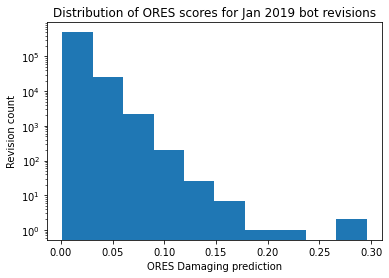

In [11]:
plt.hist(bdf.damaging_pred, log=True)
plt.title("Distribution of ORES scores for Jan 2019 bot revisions")
plt.xlabel("ORES Damaging prediction")
plt.ylabel("Revision count")
plt.show()

In [12]:
# sample a subset of the data for futher analysis
# e.g. https://en.wikipedia.org/w/index.php?diff=879519093
bdf[bdf.user_text == 'Cydebot'].sample(n=10)

,rev_timestamp,page_id,rev_id,prev_rev_id,is_minor,user_text,user_id,seconds_to_prev,curr_bytes,delta_bytes,...,seconds_to_revert,damaging_pred,goodfaith_pred,model_version,user_is_bot,user_is_trusted,user_edit_count,page_rev_count,page_namespace,is_page_redirect
1946588,1547418332,54249874,878253026,845080314,True,Cydebot,1215485,18891877,32051,-53,...,None,0.008342,0.993710,0.5.0,True,True,6496958,7,0,0
424456,1546542025,8972734,876670103,876669280,True,Cydebot,1215485,354,800,-26,...,702,0.013429,0.988580,0.4.0,True,True,6476972,19259,2,0
1988173,1547430780,37408922,878296740,519169668,True,Cydebot,1215485,196534159,958,-53,...,None,0.005860,0.995208,0.5.0,True,True,6507074,1,2,0
2669008,1547809594,13784401,879006948,879006470,True,Cydebot,1215485,352,2541,-246,...,None,0.014446,0.989809,0.5.0,True,True,6513809,68254,2,1
2833409,1547912512,28931437,879177858,875401876,True,Cydebot,1215485,2100247,7424,-36,...,None,0.008153,0.992676,0.5.0,True,True,6514571,79,0,0
2586816,1547755492,14821129,878921442,876585638,True,Cydebot,1215485,1260798,6642,2,...,None,0.005927,0.995636,0.5.0,True,True,6513527,3,0,0
2640791,1547787264,42243531,878977395,870899513,True,Cydebot,1215485,4445751,12520,-8,...,None,0.012305,0.988971,0.5.0,True,True,6513720,3,0,0
1956931,1547421656,49927542,878263910,711728962,True,Cydebot,1215485,88593902,402,-54,...,None,0.008304,0.993848,0.5.0,True,True,6499768,1,2,0
1950294,1547419567,56168655,878256991,860817638,True,Cydebot,1215485,9729881,16840,-53,...,None,0.008988,0.991175,0.5.0,True,True,6497969,9,0,0
1873049,1547388022,47430146,878175377,839224946,True,Cydebot,1215485,22159250,12902,-53,...,None,0.008692,0.990915,0.5.0,True,True,6484011,6,0,0


In [ ]:
# TODO: Look at 20 revisions from Cydebot on Wikipedia. What are they trying to accomplish?
# TODO: Read the documentation on Cydebot's user page. Find and link here 